### Fuzzy Triangular Membership Functions


#### Version 1.0

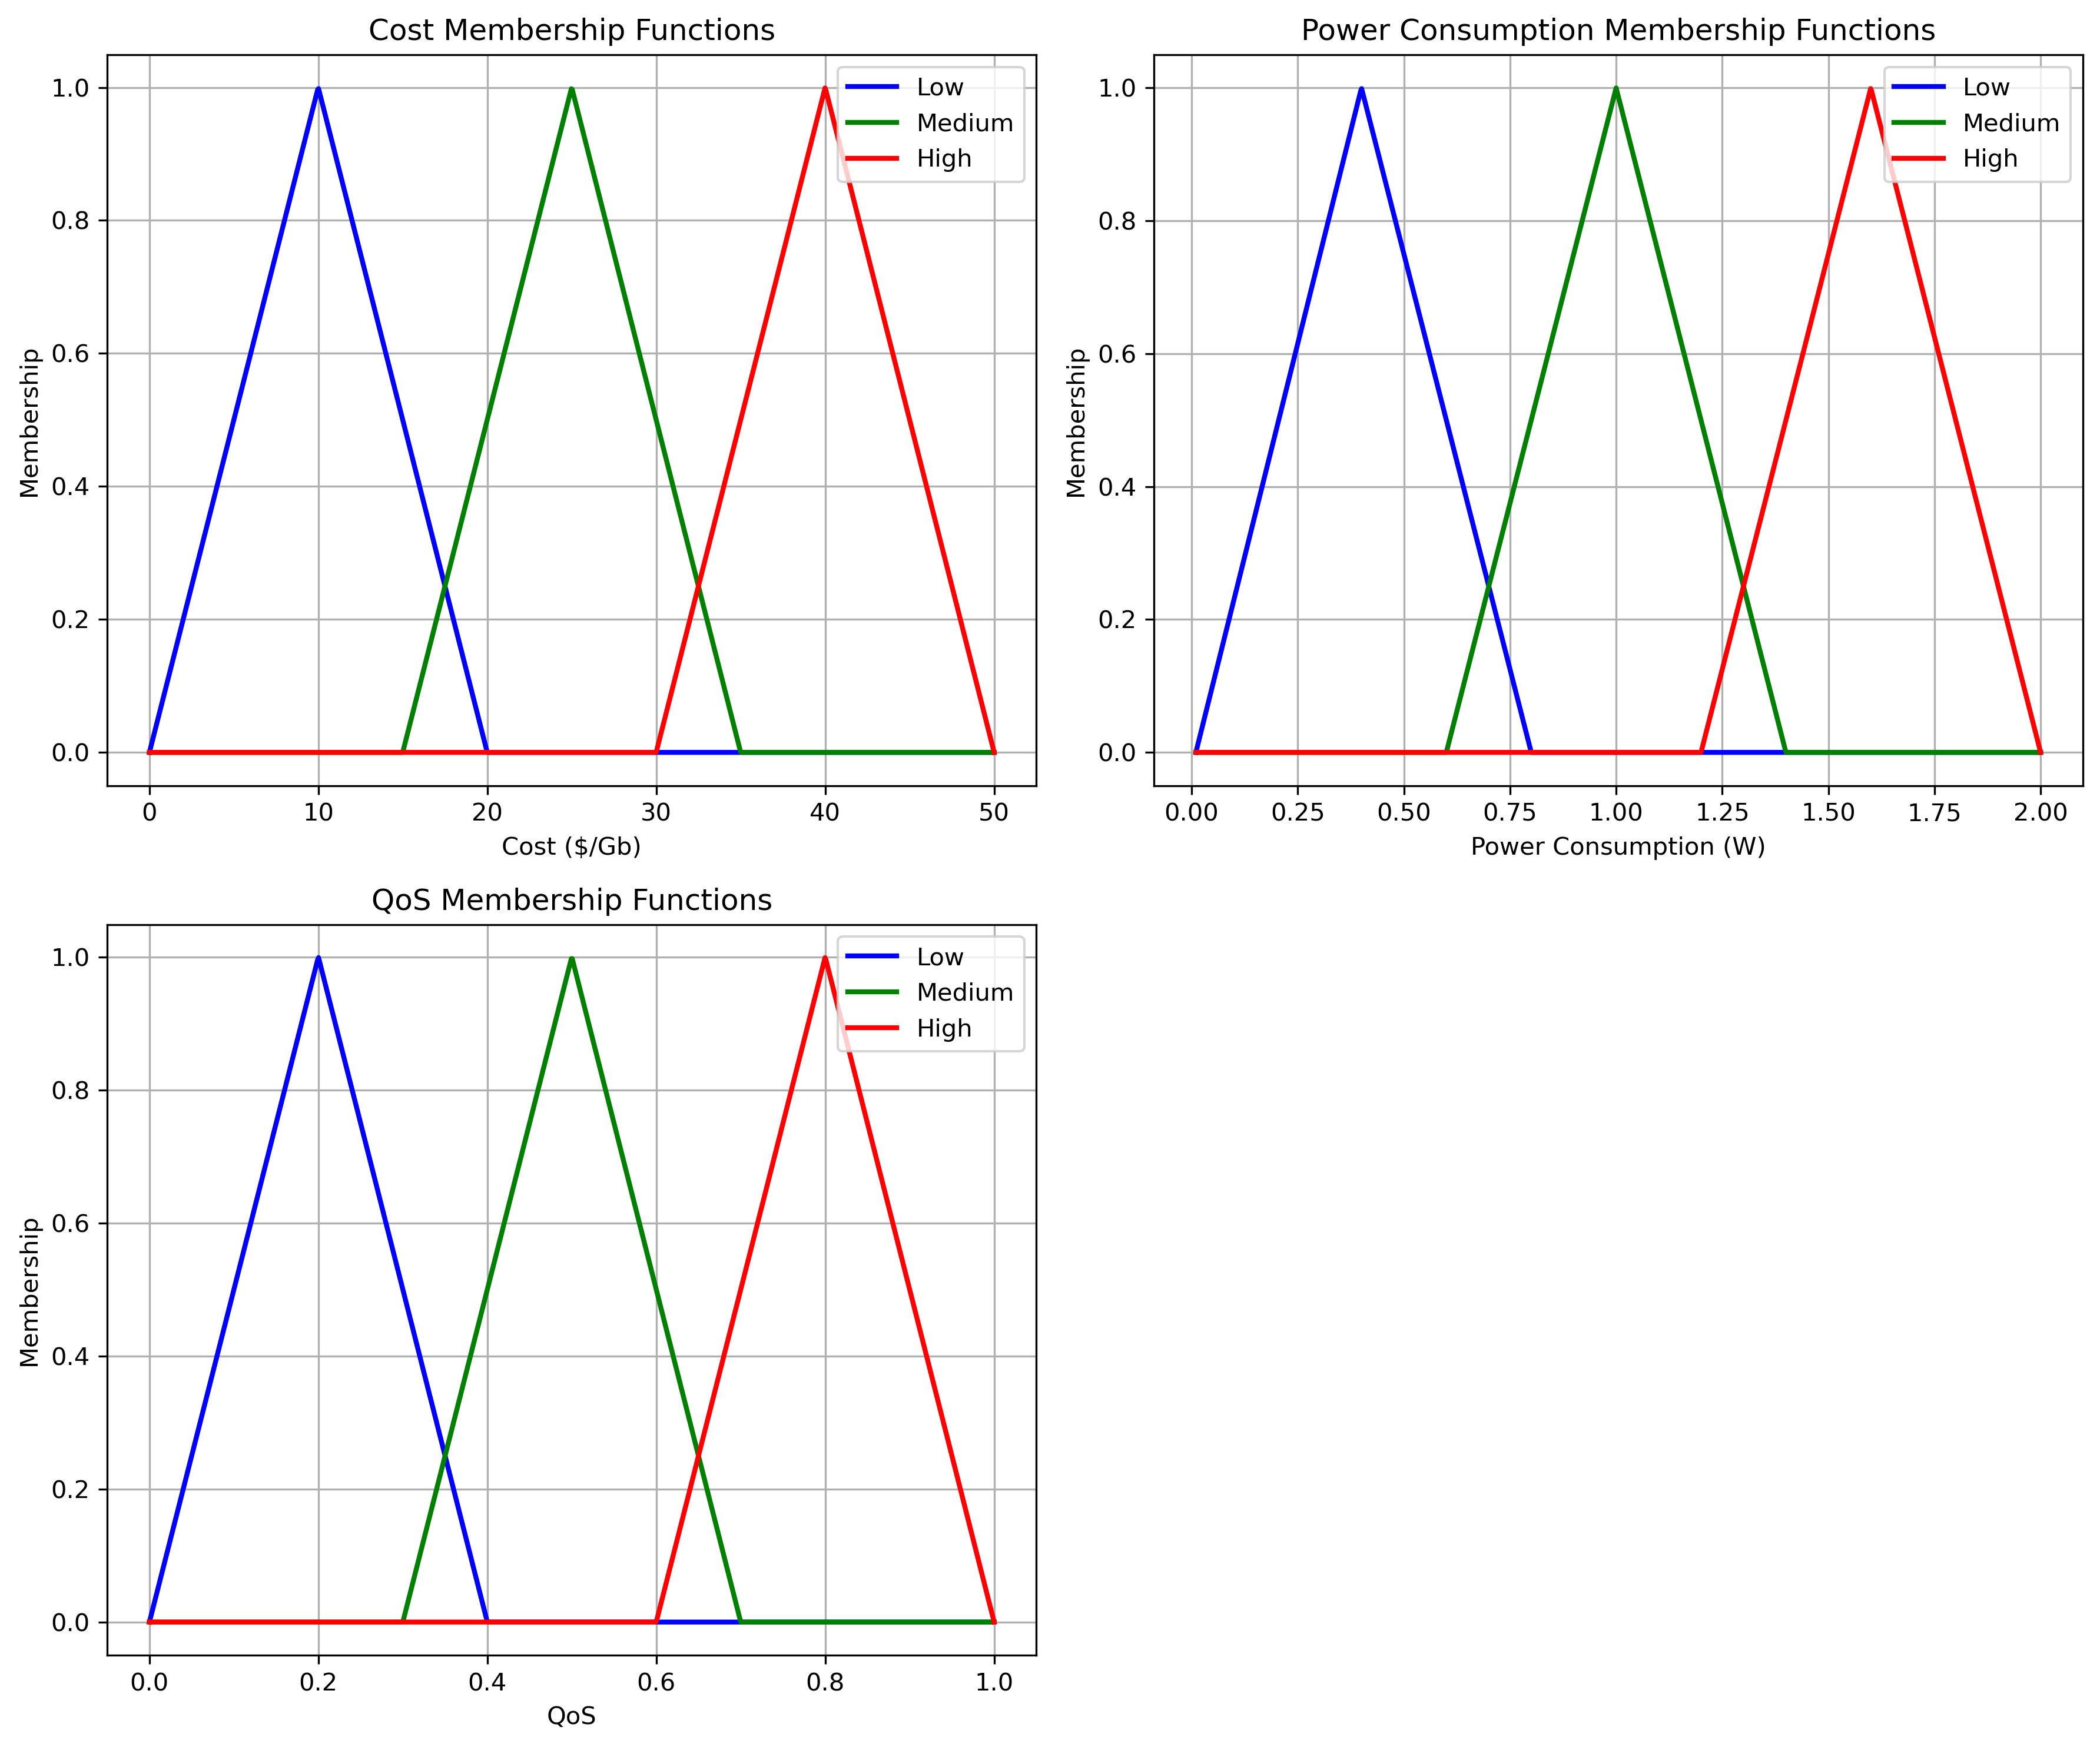

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Image


def triangular_mf(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

def plot_membership_functions(ax, x, low, medium, high, title, xlabel):
    ax.plot(x, low, 'b-', linewidth=2, label='Low')
    ax.plot(x, medium, 'g-', linewidth=2, label='Medium')
    ax.plot(x, high, 'r-', linewidth=2, label='High')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Membership')
    ax.legend()
    ax.grid(True)

# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.delaxes(axs[1, 1])  # Remove the fourth subplot

# Graph 1: Cost (0.01 to 50 $/Gb)
x_cost = np.linspace(0.01, 50, 1000)
cost_low = triangular_mf(x_cost, 0.01, 10, 20)
cost_medium = triangular_mf(x_cost, 15, 25, 35)
cost_high = triangular_mf(x_cost, 30, 40, 50)
plot_membership_functions(axs[0, 0], x_cost, cost_low, cost_medium, cost_high, 'Cost Membership Functions', 'Cost ($/Gb)')

# Graph 2: Power Consumption (0.01 to 2 W)
x_power = np.linspace(0.01, 2, 1000)
power_low = triangular_mf(x_power, 0.01, 0.4, 0.8)
power_medium = triangular_mf(x_power, 0.6, 1, 1.4)
power_high = triangular_mf(x_power, 1.2, 1.6, 2)
plot_membership_functions(axs[0, 1], x_power, power_low, power_medium, power_high, 'Power Consumption Membership Functions', 'Power Consumption (W)')

# Graph 3: QoS (0 to 1)
x_qos = np.linspace(0, 1, 1000)
qos_low = triangular_mf(x_qos, 0, 0.2, 0.4)
qos_medium = triangular_mf(x_qos, 0.3, 0.5, 0.7)
qos_high = triangular_mf(x_qos, 0.6, 0.8, 1)
plot_membership_functions(axs[1, 0], x_qos, qos_low, qos_medium, qos_high, 'QoS Membership Functions', 'QoS')

# Adjust the layout and display the plots
#plt.tight_layout()
#plt.show()

# Adjust the layout
plt.tight_layout()

# Save the figure
filename = 'membership_functions.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

# Display the saved image
display(Image(filename=filename))

# Optional: Close the figure to free up memory
plt.close(fig)

#### Version 1.1


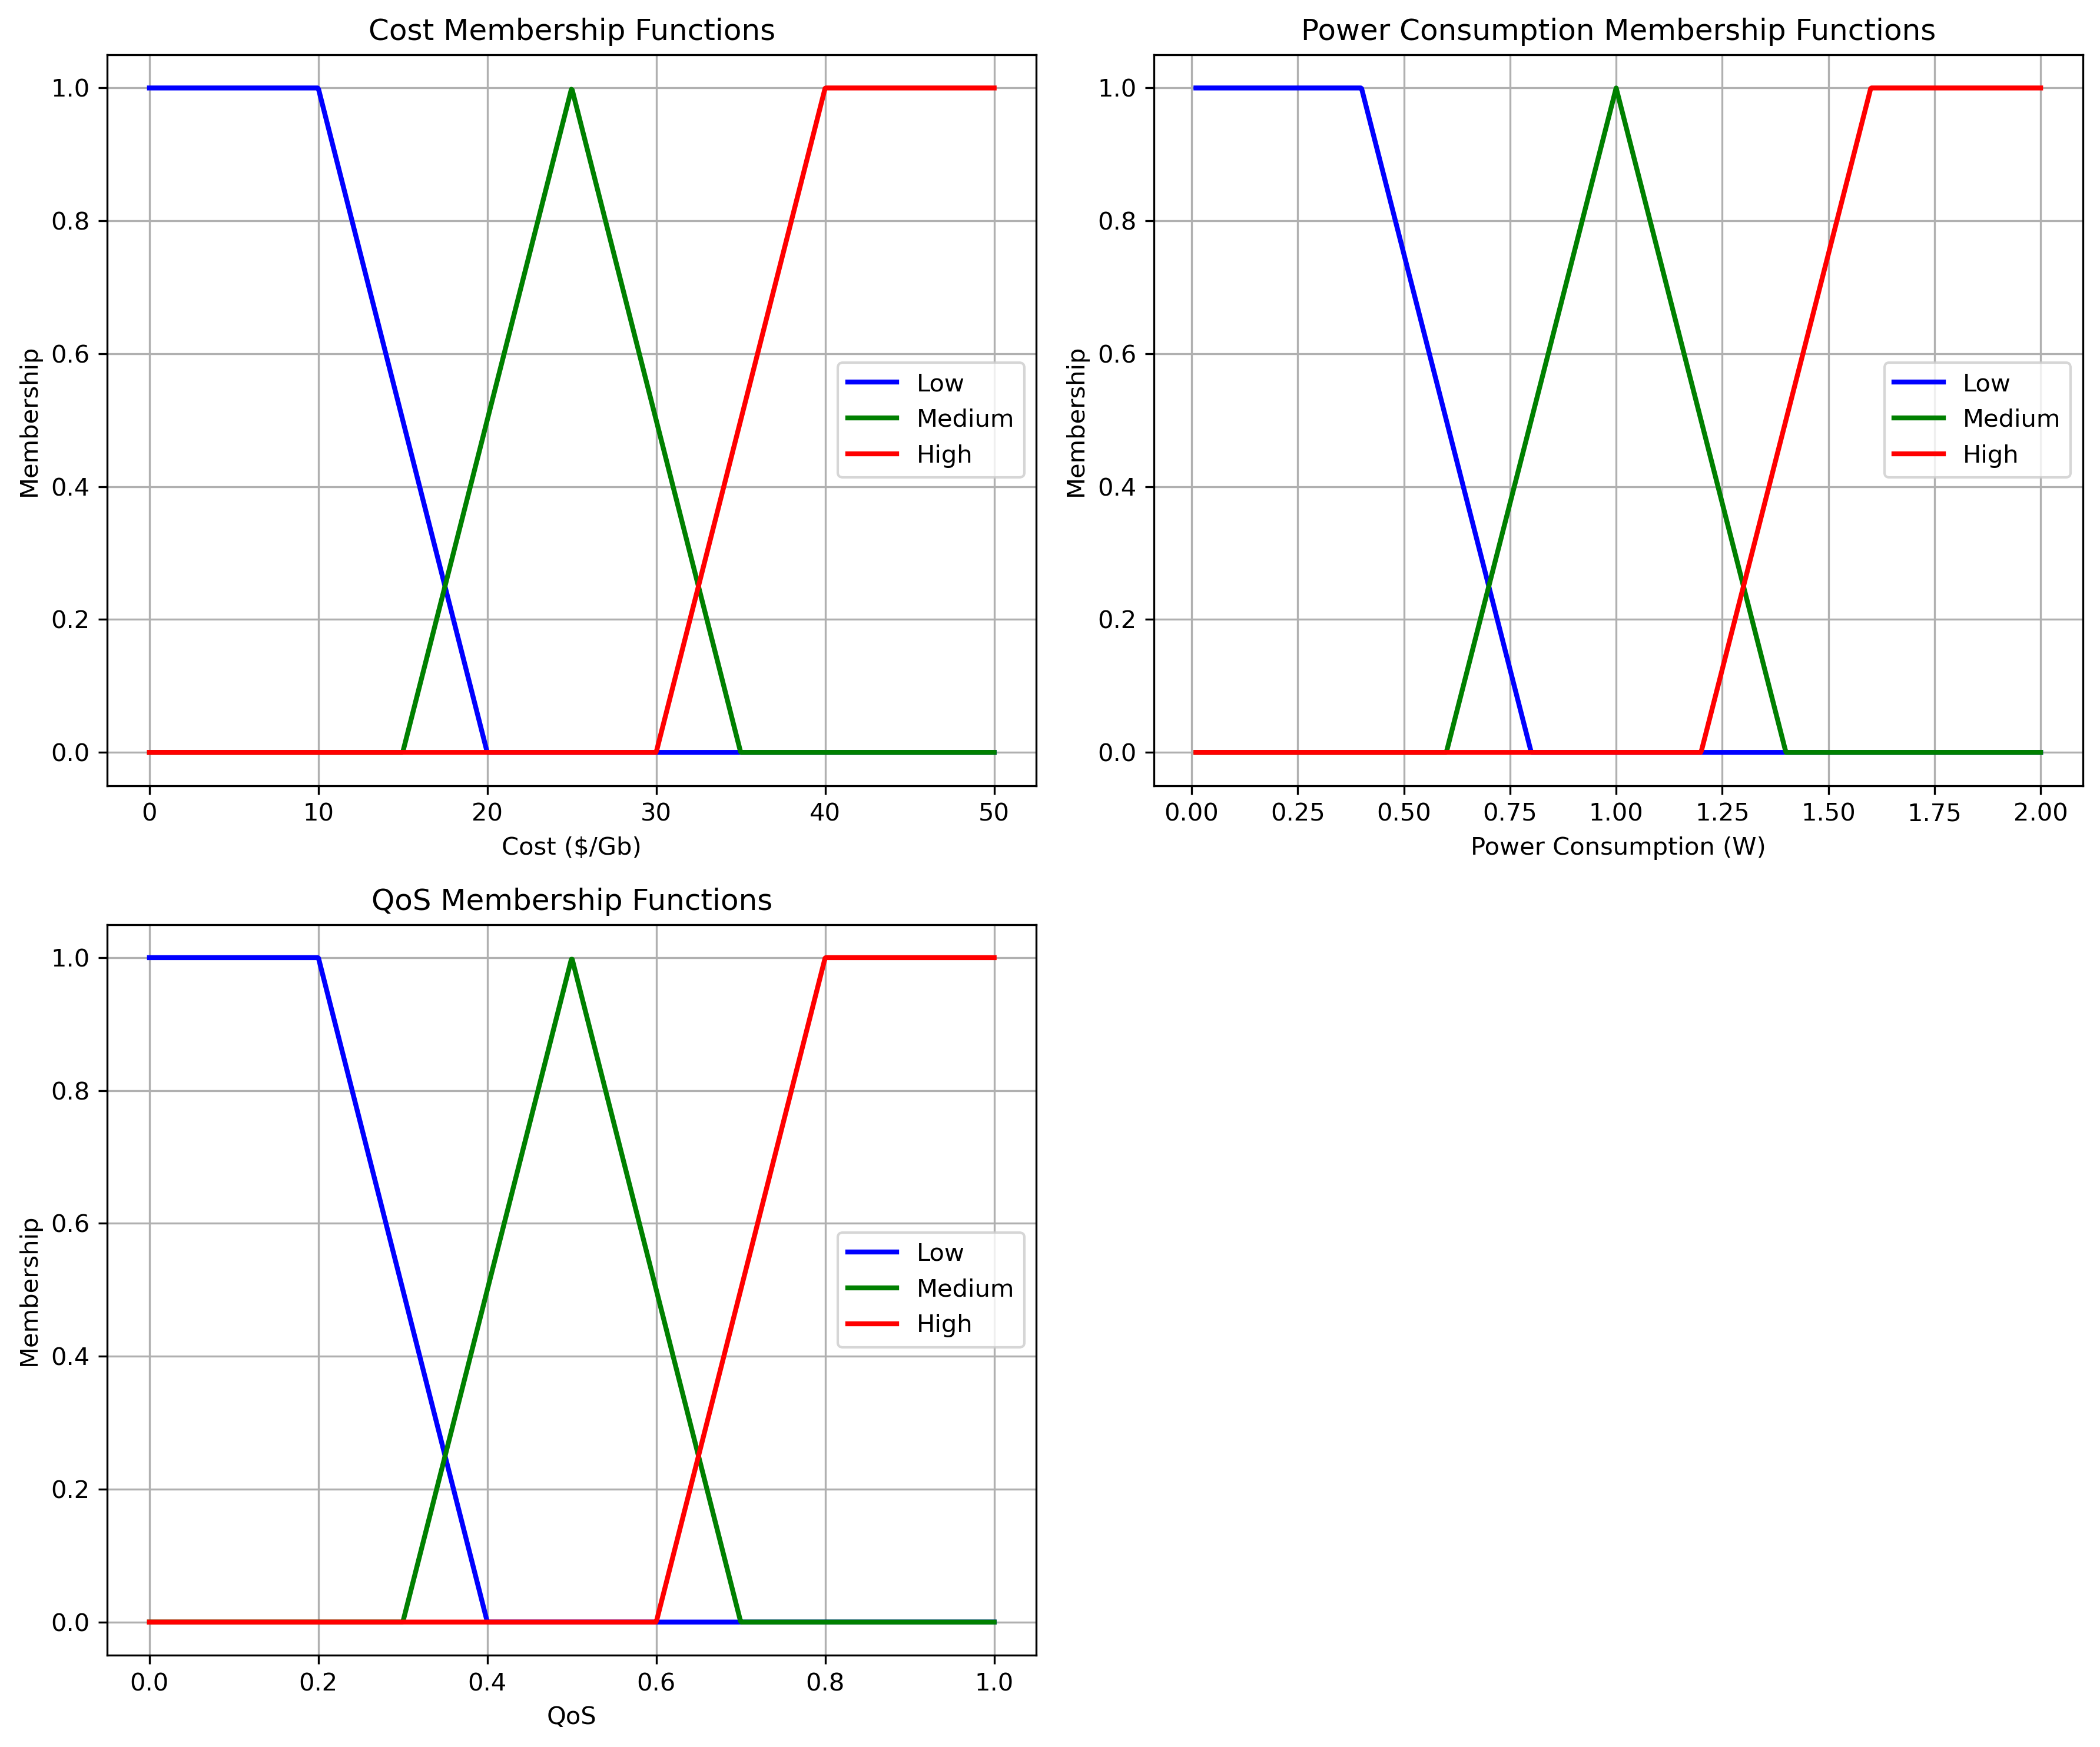

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

def low_mf(x, a, b):
    return np.where(x <= a, 1, np.maximum(0, (b - x) / (b - a)))

def medium_mf(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

def high_mf(x, b, c):
    return np.where(x >= c, 1, np.maximum(0, (x - b) / (c - b)))

def plot_membership_functions(ax, x, low, medium, high, title, xlabel):
    ax.plot(x, low, 'b-', linewidth=2, label='Low')
    ax.plot(x, medium, 'g-', linewidth=2, label='Medium')
    ax.plot(x, high, 'r-', linewidth=2, label='High')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Membership')
    ax.legend()
    ax.grid(True)

# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.delaxes(axs[1, 1])  # Remove the fourth subplot

# Graph 1: Cost (0.01 to 50 $/Gb)
x_cost = np.linspace(0.01, 50, 1000)
cost_low = low_mf(x_cost, 10, 20)
cost_medium = medium_mf(x_cost, 15, 25, 35)
cost_high = high_mf(x_cost, 30, 40)
plot_membership_functions(axs[0, 0], x_cost, cost_low, cost_medium, cost_high, 'Cost Membership Functions', 'Cost ($/Gb)')

# Graph 2: Power Consumption (0.01 to 2 W)
x_power = np.linspace(0.01, 2, 1000)
power_low = low_mf(x_power, 0.4, 0.8)
power_medium = medium_mf(x_power, 0.6, 1, 1.4)
power_high = high_mf(x_power, 1.2, 1.6)
plot_membership_functions(axs[0, 1], x_power, power_low, power_medium, power_high, 'Power Consumption Membership Functions', 'Power Consumption (W)')

# Graph 3: QoS (0 to 1)
x_qos = np.linspace(0, 1, 1000)
qos_low = low_mf(x_qos, 0.2, 0.4)
qos_medium = medium_mf(x_qos, 0.3, 0.5, 0.7)
qos_high = high_mf(x_qos, 0.6, 0.8)
plot_membership_functions(axs[1, 0], x_qos, qos_low, qos_medium, qos_high, 'QoS Membership Functions', 'QoS')

# Adjust the layout
plt.tight_layout()

# Save the figure
filename = 'membership_functions.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

# Display the saved image
display(Image(filename=filename))

# Close the figure to free up memory
plt.close(fig)

### AHP 
##### Pairwise Matrices

In [4]:
voip = np.matrix([
    [1,	5,	3,	7],
    [0.200,	1,	0.333,	3],
    [0.333,	3,	1,	5],
    [0.143,	0.333,	0.200,	1]
])

vs = np.matrix([
    [1,	3,	0.333,	0.200],
    [0.333,	1,	0.200,	0.200],
    [3,	5,	1,	0.333],
    [5,	5,	3,	1]
])

cg = np.matrix([
    [1,	3,	5,	7],
    [0.33,	1,	3,	5],
    [0.200,	0.333,	1,	3],
    [0.143,	0.200,	0.333, 1]
])	

ei = np.matrix([
    [1,	1,	1,	1],
    [1,	1,	1,	1],
    [1,	1,	1,	1],
    [1,	1,	1,	1]
])

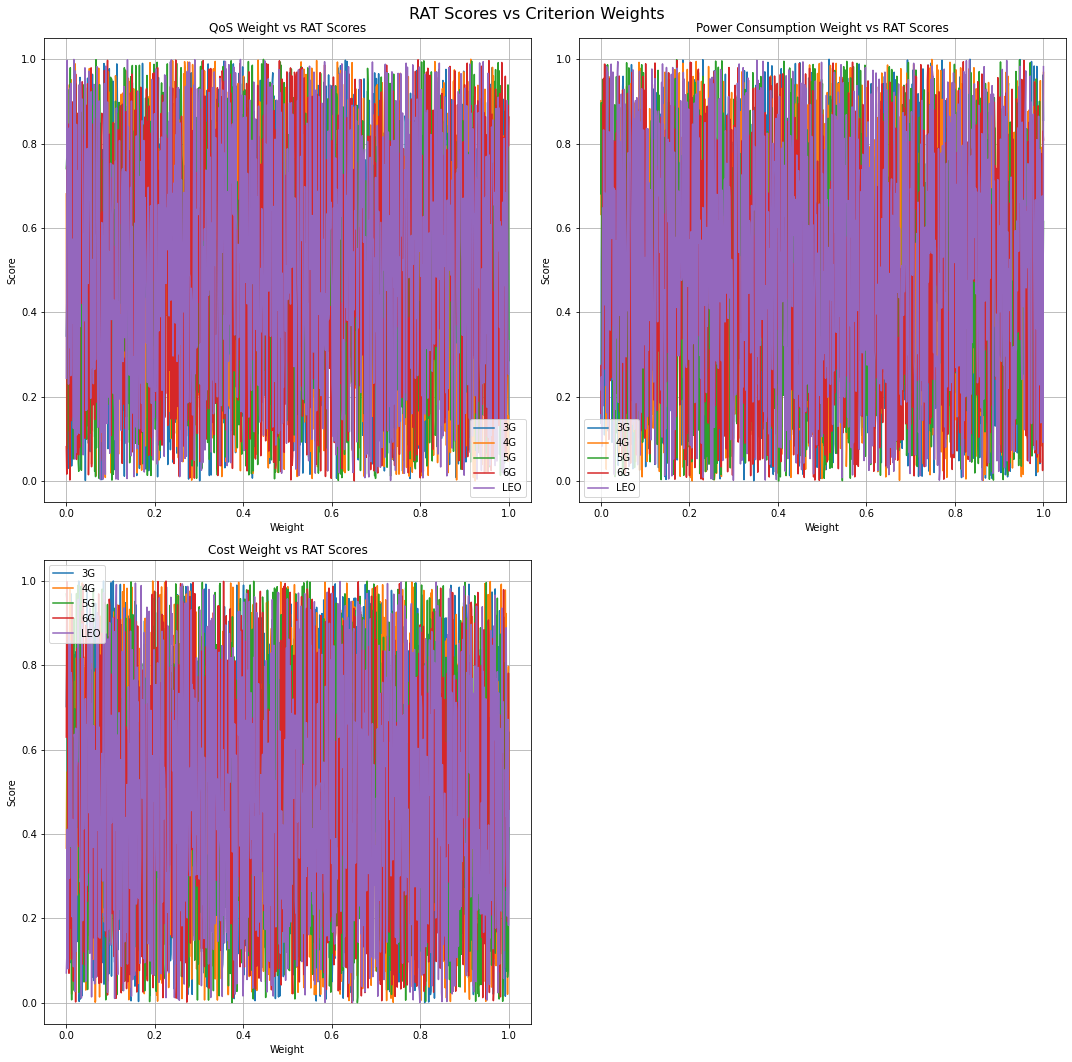

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data (replace this with your actual data)
num_samples = 1000
criteria = ['QoS', 'Power Consumption', 'Cost']
rats = ['3G', '4G', '5G', '6G', 'LEO']
weights = np.linspace(0, 1, num_samples)

# Generate random data for demonstration
M = np.random.rand(3, num_samples, 5)

# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('RAT Scores vs Criterion Weights', fontsize=16)

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Colors for each RAT
colors = ['b', 'g', 'r', 'c', 'm']

# Plot each criterion
for i, criterion in enumerate(criteria):
    ax = axs[i]
    for j, rat in enumerate(rats):
        ax.plot(weights, M[i, :, j], label=rat)
    
    ax.set_xlabel('Weight')
    ax.set_ylabel('Score')
    ax.set_title(f'{criterion} Weight vs RAT Scores')
    ax.legend()
    ax.grid(True)

# Remove the unused subplot
axs[3].remove()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

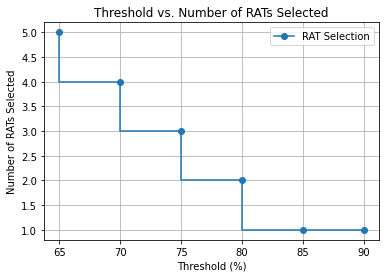

In [16]:
plt.plot(thresholds, num_rats_selected, drawstyle='steps-post', marker='o', label='RAT Selection')
plt.xlabel('Threshold (%)')
plt.ylabel('Number of RATs Selected')
plt.title('Threshold vs. Number of RATs Selected')
plt.grid(True)
plt.legend()
plt.show()

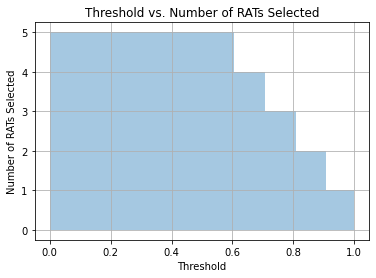

In [17]:
import matplotlib.pyplot as plt
import numpy as np

thresholds = np.linspace(0, 1, 100)  # Continuous threshold from 0% to 100%
# Example data
def calculate_rats_selected(threshold):
    if threshold >= 0.9:
        return 1
    elif threshold >= 0.8:
        return 2
    elif threshold >= 0.7:
        return 3
    elif threshold >= 0.6:
        return 4
    else:
        return 5
num_rats_selected = [1, 1, 2, 3, 4, 5]
rats_selected = [calculate_rats_selected(t) for t in thresholds]  # Discrete steps based on threshold

plt.fill_between(thresholds, rats_selected, step='post', alpha=0.4)  # Area plot
plt.xlabel('Threshold')
plt.ylabel('Number of RATs Selected')
plt.title('Threshold vs. Number of RATs Selected')
plt.grid(True)
plt.show()


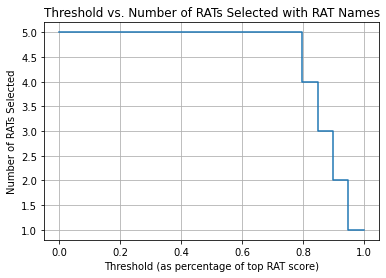

In [19]:
# Sample data: RAT scores and names
ranked_rats = [
    {'name': 'RAT1', 'score': 95},
    {'name': 'RAT2', 'score': 90},
    {'name': 'RAT3', 'score': 85},
    {'name': 'RAT4', 'score': 80},
    {'name': 'RAT5', 'score': 75}
]

# Function to simulate selection based on a continuous threshold
def calculate_rats_selected(threshold):
    selected_rats = [rat['name'] for rat in ranked_rats if rat['score'] >= threshold * ranked_rats[0]['score']]
    return len(selected_rats), selected_rats  # Return the number and names of selected RATs

# Generate thresholds from 0% to 100%
thresholds = np.linspace(0, 1, 100)
rats_selected = []
rat_names_at_threshold = []

# Loop through the thresholds and determine how many RATs and their names are selected
for t in thresholds:
    num_rats, selected_names = calculate_rats_selected(t)
    rats_selected.append(num_rats)
    rat_names_at_threshold.append(selected_names)

# Create the step plot
plt.step(thresholds, rats_selected, where='post')

# Add RAT names as annotations at key threshold points (optional: choose every nth point or significant changes)
# for i, threshold in enumerate(thresholds):
#     if i % 10 == 0 or i == len(thresholds) - 1:  # Annotate every 10th point for readability
#         plt.text(threshold, rats_selected[i], f"{', '.join(rat_names_at_threshold[i])}", fontsize=8)

# Set labels and title
plt.xlabel('Threshold (as percentage of top RAT score)')
plt.ylabel('Number of RATs Selected')
plt.title('Threshold vs. Number of RATs Selected with RAT Names')
plt.grid(True)

plt.show()
